In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1_with_scores.csv")

In [3]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [4]:
y = df['Role_encoded']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, random_state=42, probability=True))
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {acc}")

SVM Accuracy: 0.4696601941747573


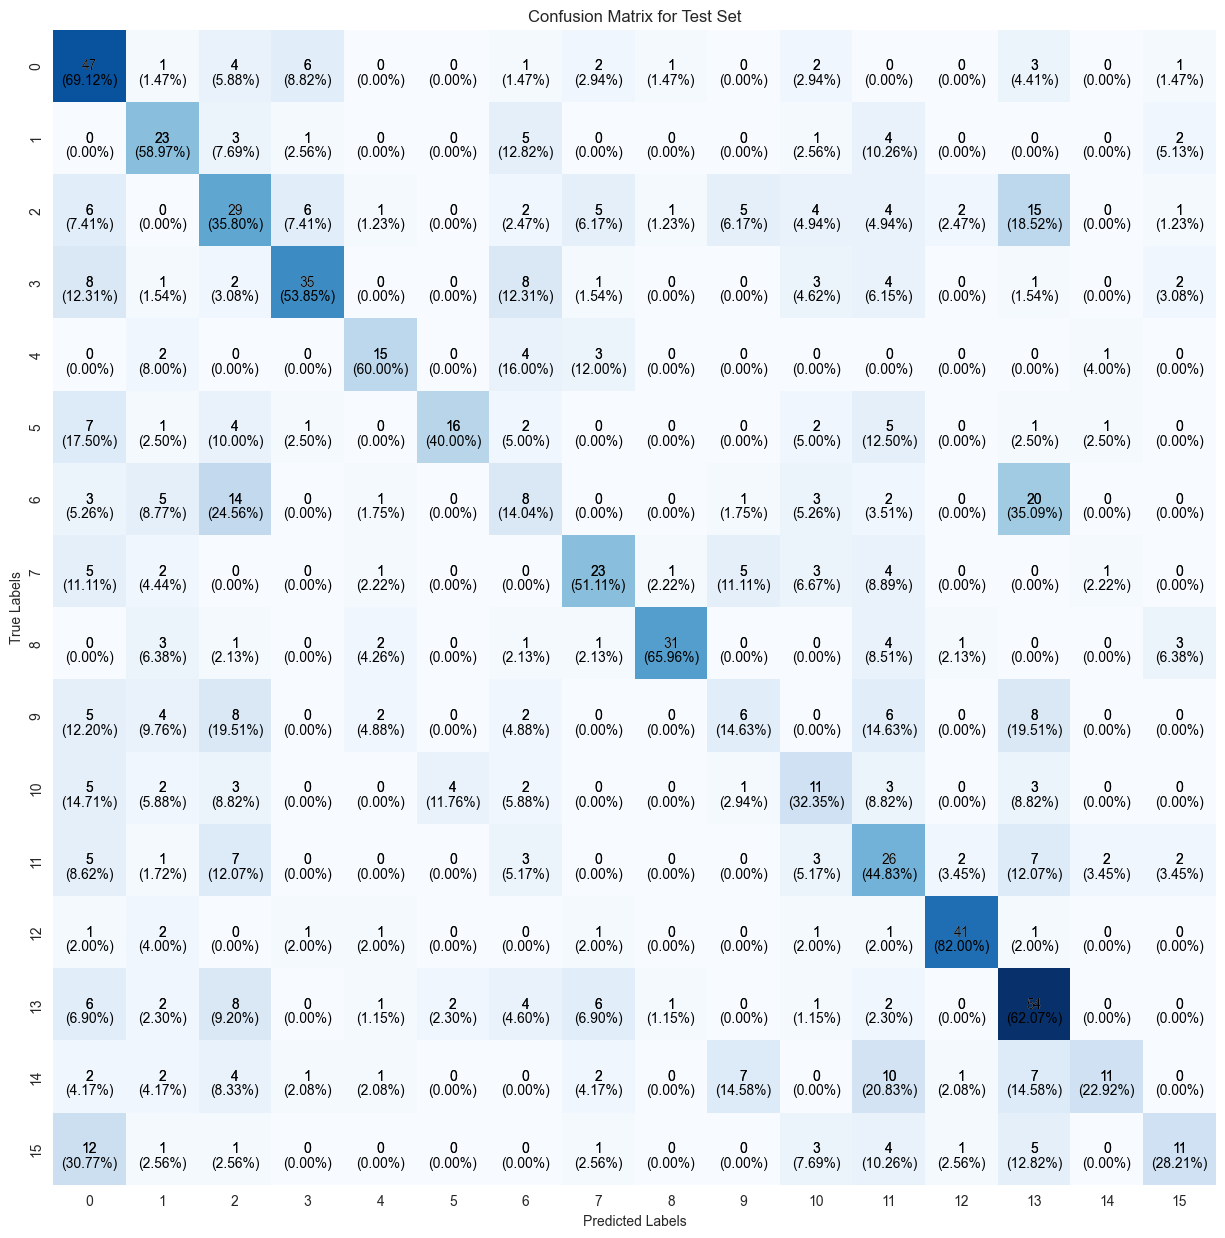

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.69      0.52        68
           1       0.44      0.59      0.51        39
           2       0.33      0.36      0.34        81
           3       0.69      0.54      0.60        65
           4       0.60      0.60      0.60        25
           5       0.73      0.40      0.52        40
           6       0.19      0.14      0.16        57
           7       0.51      0.51      0.51        45
           8       0.89      0.66      0.76        47
           9       0.24      0.15      0.18        41
          10       0.30      0.32      0.31        34
          11       0.33      0.45      0.38        58
          12       0.85      0.82      0.84        50
          13       0.43      0.62      0.51        87
          14       0.69      0.23      0.34        48
          15       0.50      0.28      0.36        39

    accuracy                           0.47       824
   macro avg       0.51   

---------------------------------------------------------------------------------------------------

In [9]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1.csv")

In [10]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [11]:
y = df['Role_encoded']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, random_state=42, probability=True))
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {acc}")

SVM Accuracy: 0.49029126213592233


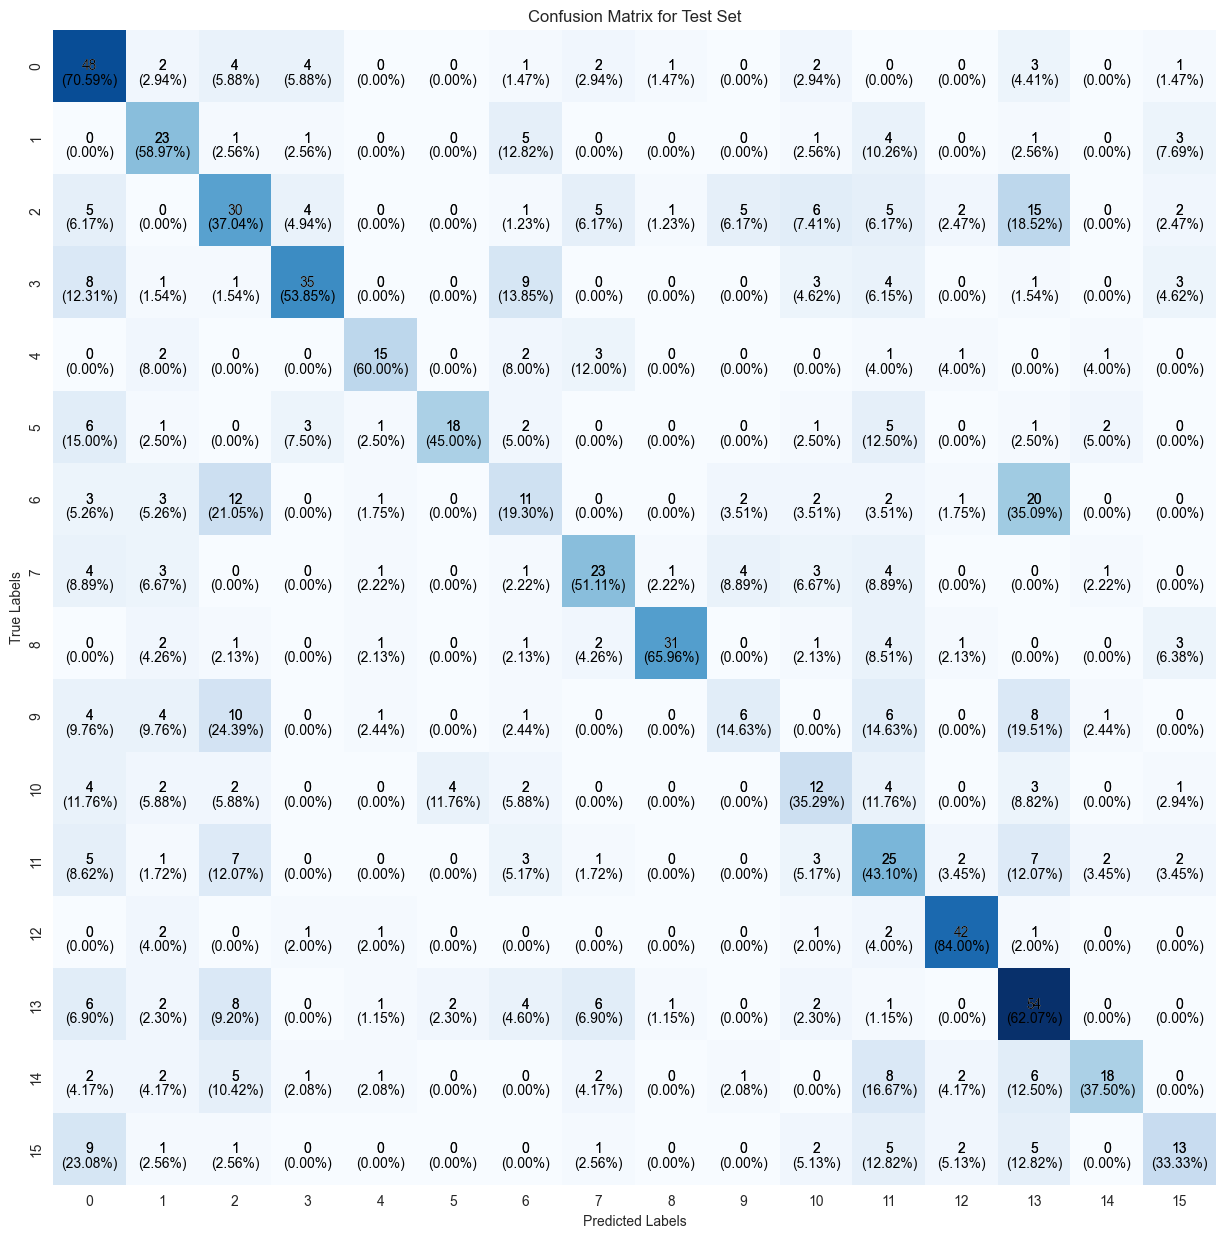

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.71      0.56        68
           1       0.45      0.59      0.51        39
           2       0.37      0.37      0.37        81
           3       0.71      0.54      0.61        65
           4       0.65      0.60      0.62        25
           5       0.75      0.45      0.56        40
           6       0.26      0.19      0.22        57
           7       0.51      0.51      0.51        45
           8       0.89      0.66      0.76        47
           9       0.33      0.15      0.20        41
          10       0.31      0.35      0.33        34
          11       0.31      0.43      0.36        58
          12       0.79      0.84      0.82        50
          13       0.43      0.62      0.51        87
          14       0.72      0.38      0.49        48
          15       0.46      0.33      0.39        39

    accuracy                           0.49       824
   macro avg       0.53   